In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
# train_input

# 하나의 [] 안에 28*28

In [5]:
train_input.shape

(60000, 28, 28)

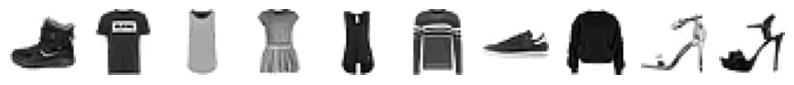

In [6]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')  # gray_r: 현재색 반전 # 0,0,0 검정색 - 255,255,255 흰색
    axs[i].axis('off') # 눈금제거
plt.show()

In [7]:
# 표준화 작업
train_scaled = train_input/255.0
test_scaled = test_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그래도 적용(28,28)
# Flatten 은 평평하게 해준다는 의미 28*28 구조를 1차원 형태로

train_scaled.shape  # 3차원에서 2차원으로 바뀜

(60000, 28, 28)

In [8]:
# train data 일부를 검증세트로 만들어주기
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [9]:
# 패션 mlist 딥러닝을 구현하시오

# 변경
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층(밀집) 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층(출력) 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# # 옵티마이저 - adam
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
# 밀집층
model.add(keras.layers.Dense(100,activation='relu',name='hidden')) # 'sigmoid'
# 출력층
# 이진분류이면, softmax -> relu 라고 적어도 되지만 다중분류일 시 softmax를 적어주는게 좋다~ 
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

epochs = 20 훈련세트 정확도 높아짐( accuracy: 0.9460, loss: 0.1440 )\
검증세트를 가지고 정확도를 측정해보자

In [12]:
# 옵티마이저 - adam
# 딥러닝 훈련
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# history에 epochs를 돌때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7740 - loss: 0.6714
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8587 - loss: 0.4032
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.3569
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8778 - loss: 0.3344
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.3087
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2929
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2741
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8991 - loss: 0.2675
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9033 - loss: 0.2599
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9103 - loss: 0.2419
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9111 - loss: 0.2394
Epoch 12/20
1500/1500 ━━━━━━━━

In [13]:
# history의 keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [14]:
# train세트 검증 데이터(loss,accruacy) 그래프

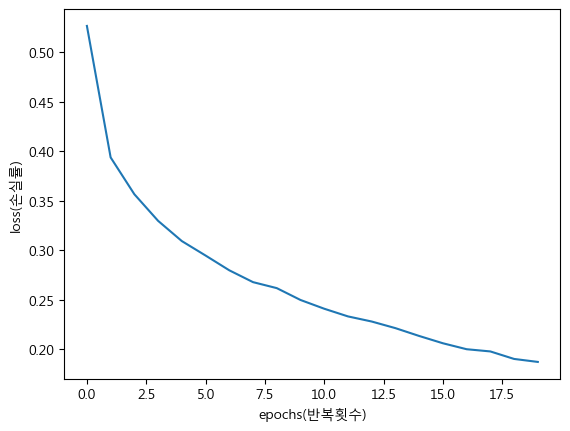

In [15]:
# import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('loss(손실률)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()


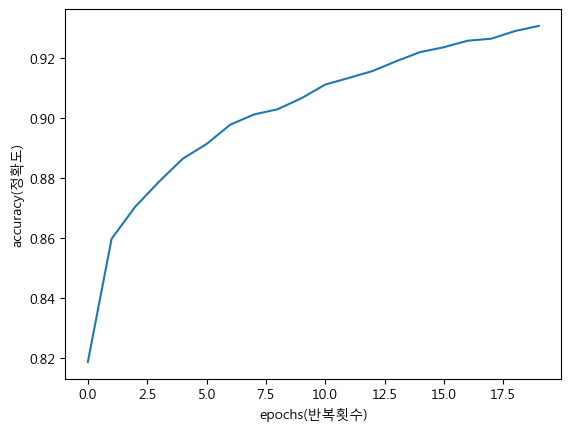

In [16]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epochs(반복횟수)')
plt.ylabel('accuracy(정확도)')
plt.show()

val_scaled : 검증세트도 함께 검증

In [17]:
# model.fit() -> loss,accuracy 정보를 리턴
# 검증세트 (test,val)도 함께 검증- history 정보로 받을 수 있음


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장
# train_scaled, val_scaled를 함께 훈련 시팀
history = model.fit(train_scaled, train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9319 - loss: 0.1822 - val_accuracy: 0.8883 - val_loss: 0.3447
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9356 - loss: 0.1738 - val_accuracy: 0.8878 - val_loss: 0.3456
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9366 - loss: 0.1711 - val_accuracy: 0.8884 - val_loss: 0.3587
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9399 - loss: 0.1644 - val_accuracy: 0.8896 - val_loss: 0.3604
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9414 - loss: 0.1600 - val_accuracy: 0.8855 - val_loss: 0.3686
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9413 - loss: 0.1582 - val_accuracy: 0.8865 - val_loss: 0.3658
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9430 - loss: 0.1542 - val_accuracy: 0.8861 - val_loss: 0.3852
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9451 - loss: 0.1507 - 

In [19]:
# train 세트의 accuarcy 와 val 세트의 val_accuracy가 함께 나온다.

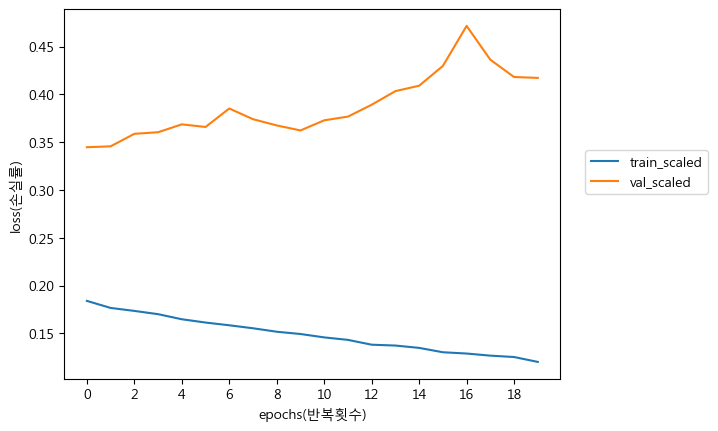

In [23]:
plt.plot(history.history['loss'],label='train_scaled')
plt.plot(history.history['val_loss'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.ylabel('loss(손실률)')
plt.xlabel('epochs(반복횟수)')
plt.legend(loc=(1.05,0.5))
plt.show()

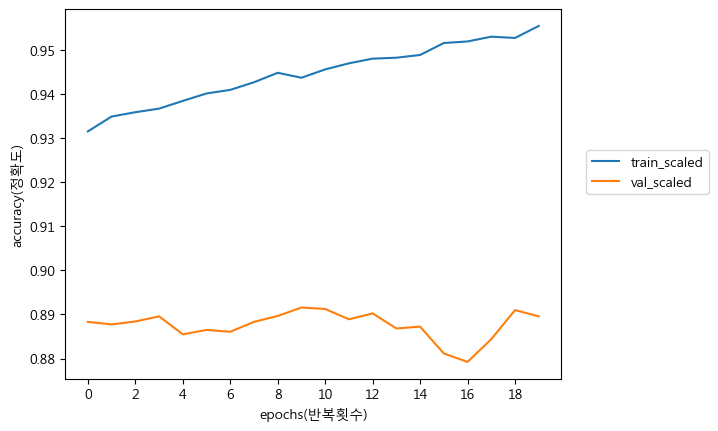

In [24]:
plt.plot(history.history['accuracy'],label='train_scaled')
plt.plot(history.history['val_accuracy'],label='val_scaled')
plt.xticks([i for i in range(0,20,2)])
plt.ylabel('accuracy(정확도)')
plt.xlabel('epochs(반복횟수)')
plt.legend(loc=(1.05,0.5))
plt.show()

# 반복횟수가 증가할수록 과대적합의 경향을 띤다

In [22]:
# 딥러닝 모델 평가
model.evaluate(val_scaled,val_target)  # 검증데이터(val_scaled)를 가지고 검증

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.4209


[0.4171927869319916, 0.8895833492279053]